In [2]:
!nvidia-smi

Sat Mar 16 15:44:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.34                 Driver Version: 537.34       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4080      WDDM  | 00000000:01:00.0  On |                  N/A |
|  0%   39C    P8              10W / 340W |   2445MiB / 16376MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

c:\Users\saira\anaconda3\envs\zone\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Nov_30_19:15:10_Pacific_Standard_Time_2020
Cuda compilation tools, release 11.2, V11.2.67
Build cuda_11.2.r11.2/compiler.29373293_0
torch:  1.13 ; cuda:  cu117


In [4]:
import os
HOME = os.getcwd()
print(HOME)

c:\Users\saira\Work\Zone-analysis


In [5]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')

import numpy as np
np.bool = np.bool_

Using cache found in C:\Users\saira/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-3-16 Python-3.8.0 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4080, 16376MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [6]:
OFFICE_SPACE = f"{HOME}/all_in_one.mp4"

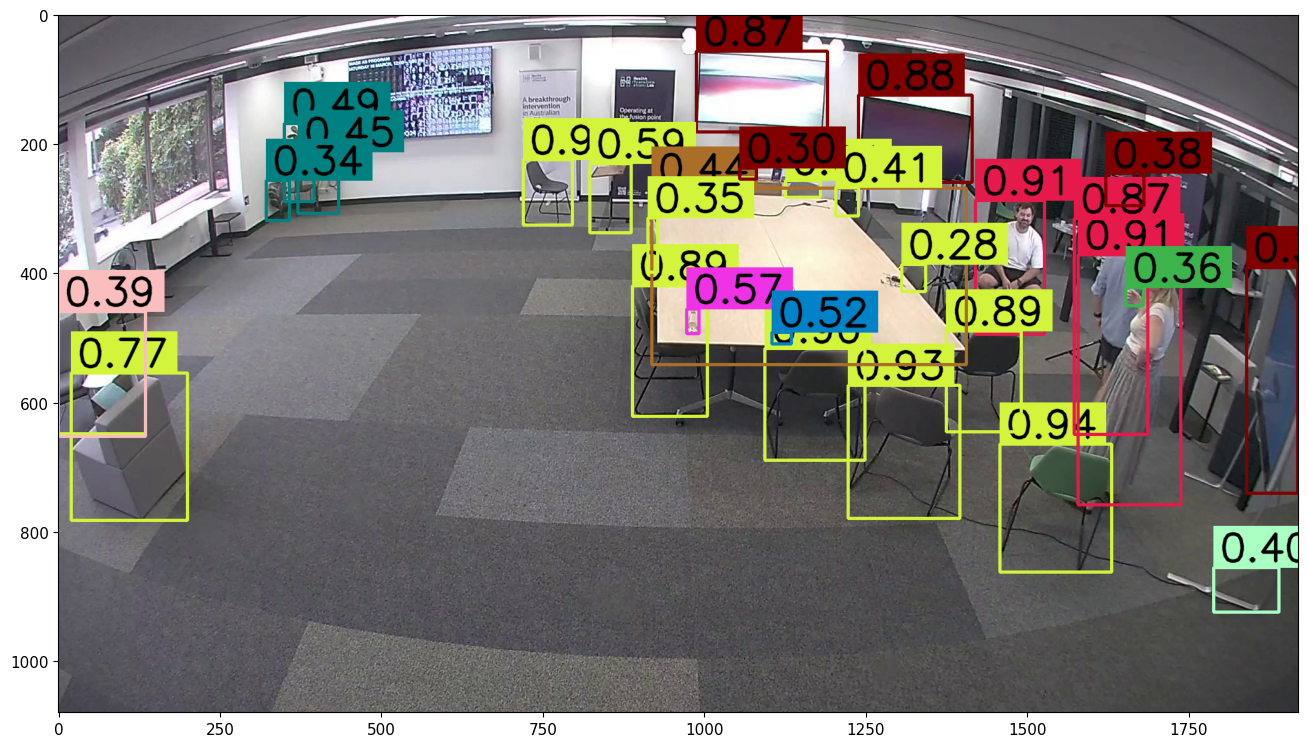

In [7]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(OFFICE_SPACE)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

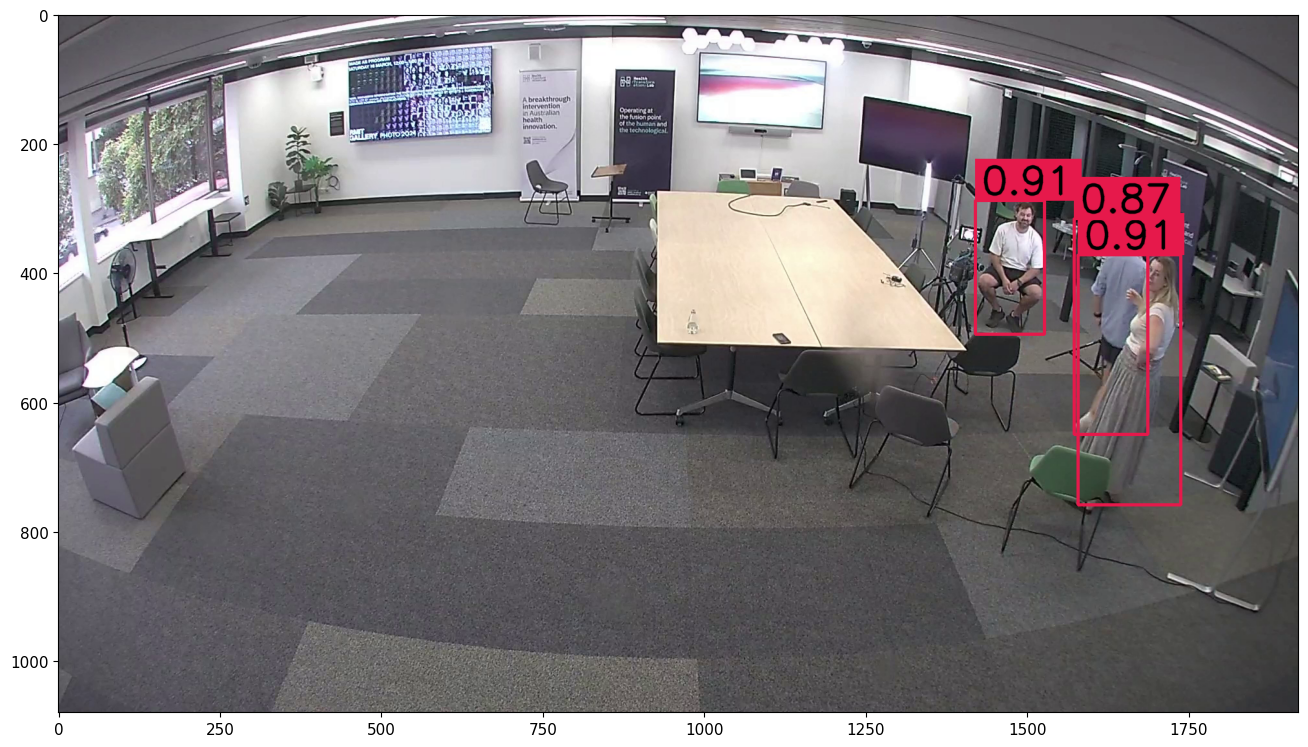

In [8]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator(OFFICE_SPACE)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

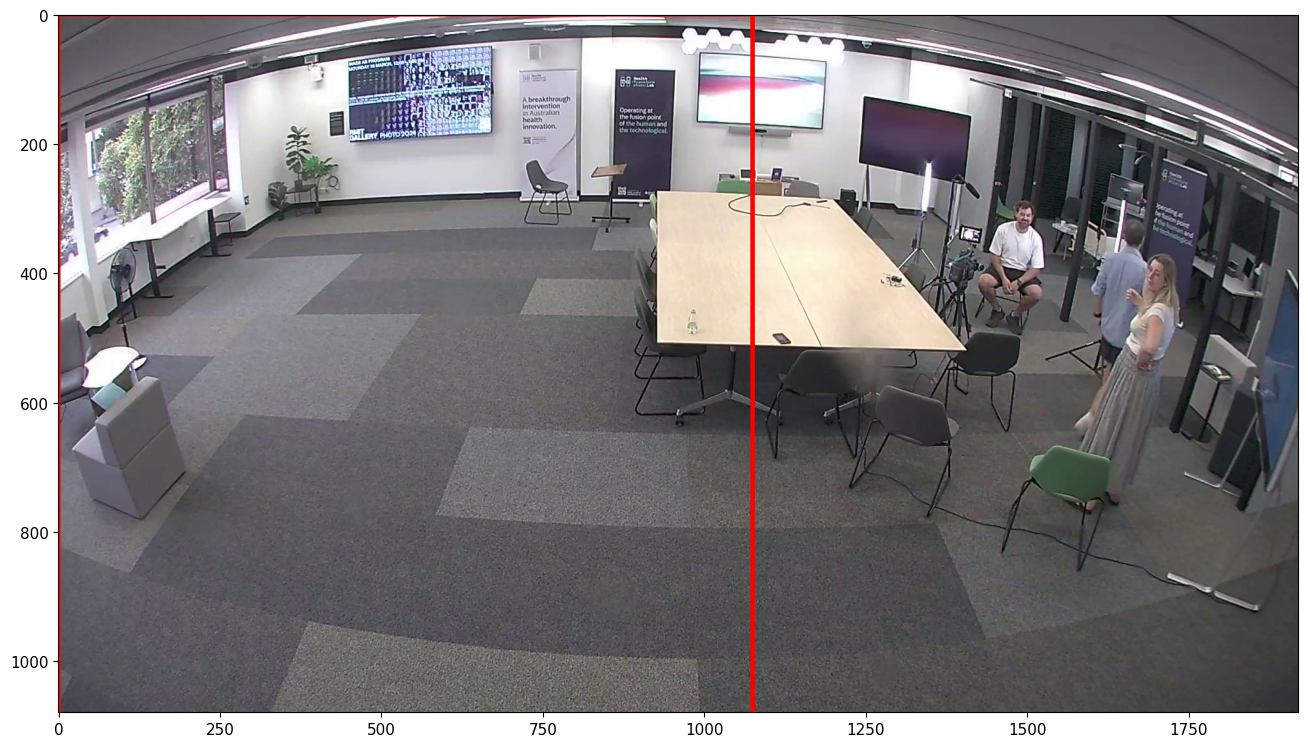

In [9]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [0, 0],
    [1080 - 5, 0],
    [1080 - 5, 1300 - 5],
    [0, 1300 - 5]
])
video_info = sv.VideoInfo.from_video_path(OFFICE_SPACE)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# extract video frame
generator = sv.get_video_frames_generator(OFFICE_SPACE)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
mask = zone.trigger(detections=detections)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5) & mask]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = sv.draw_polygon(scene=frame, polygon=polygon, color=sv.Color.red(), thickness=6)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [10]:
sv.VideoInfo.from_video_path(OFFICE_SPACE)

VideoInfo(width=1920, height=1080, fps=30, total_frames=2034)

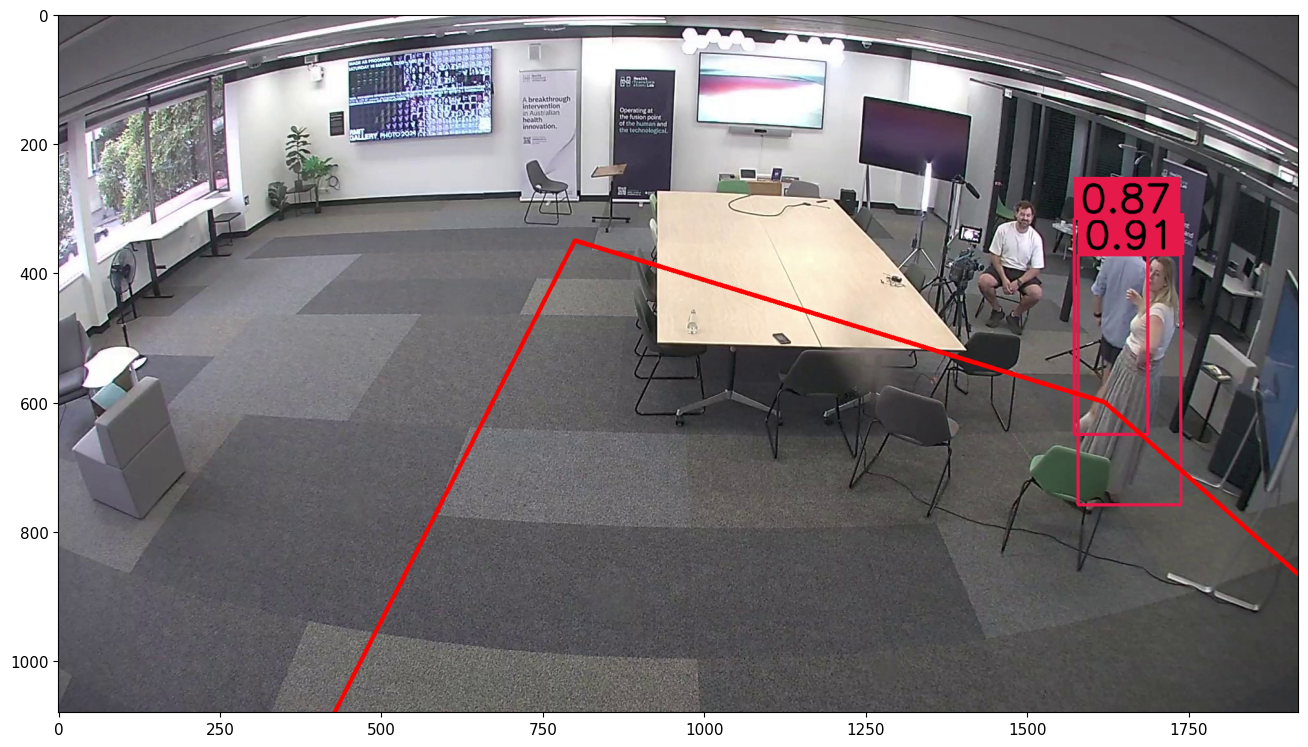

In [11]:
import numpy as np
import supervision as sv

# initiate polygon zone
polygon = np.array([
    [800,  350],
    [1620, 600],
    [2160, 1080],
    [1620, 2855],
    [540,  2855],
    [0,    1920]
])
video_info = sv.VideoInfo.from_video_path(OFFICE_SPACE)
zone = sv.PolygonZone(polygon=polygon, frame_resolution_wh=video_info.resolution_wh)

# extract video frame
generator = sv.get_video_frames_generator(OFFICE_SPACE)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
mask = zone.trigger(detections=detections)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5) & mask]

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = sv.draw_polygon(scene=frame, polygon=polygon, color=sv.Color.red(), thickness=6)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [12]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [0, 0],
        [1080 - 5, 0],
        [1080 - 5, 1300 - 5],
        [0, 1300 - 5]
    ], np.int32), 
    np.array([
        [1080 + 5, 0],
        [2160, 0],
        [2160, 1300 - 5],
        [1080 + 5, 1300 - 5]
    ], np.int32), 
    np.array([
        [0, 1300 + 5],
        [1080 - 5, 1300 + 5],
        [1080 - 5, 3840],
        [0, 3840]
    ], np.int32), 
    np.array([
        [1080 + 5, 1300 + 5],
        [2160, 1300 + 5],
        [2160, 3840],
        [1080 + 5, 3840]
    ], np.int32)
]
video_info = sv.VideoInfo.from_video_path(OFFICE_SPACE)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=4,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]

# extract video frame
generator = sv.get_video_frames_generator(OFFICE_SPACE)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered)
    frame = zone_annotator.annotate(scene=frame)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [13]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [925,  275 ],
        # [0, 925 ],
        [650, 285],
        [330, 1080],
        [925,  1080],
        # [0,    1920]
    ], np.int32),
    np.array([
        [928,    510],
        [928,  1080 ],
        [1883,    1080   ],
        [1400, 517]
    ], np.int32),
    np.array([
        [1203, 285 ],
        [1895, 1080],
        [1895, 780],
        [1350, 300]
        # [2160,    0]
    ], np.int32),
    
]
video_info = sv.VideoInfo.from_video_path(OFFICE_SPACE)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=6,
        text_thickness=8,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]

# extract video frame
generator = sv.get_video_frames_generator(OFFICE_SPACE)
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, size=1280)
detections = sv.Detections.from_yolov5(results)
detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
    mask = zone.trigger(detections=detections)
    detections_filtered = detections[mask]
    frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
    frame = zone_annotator.annotate(scene=frame)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

In [84]:
import datetime
import cv2
import pandas as pd

In [15]:
sv.VideoInfo.from_video_path(OFFICE_SPACE)

VideoInfo(width=1920, height=1080, fps=30, total_frames=2034)

In [144]:
# Create a dictionary with the data
data = {
    'current_datetime': [],  # Assuming 'datetime_column' is the name of your datetime column
    'color': [],  # Assuming 'value_column' is the name of your value column
    'count_value': []
}

In [151]:
colors = sv.ColorPalette.default()
polygons = [
    np.array([
        [925,  275 ],
        [650, 285],
        [330, 1080],
        [925,  1080],
    ], np.int32),
    np.array([
        [928,    510],
        [928,  1080 ],
        [1883,    1080   ],
        [1400, 517]
    ], np.int32),
    np.array([
        [1203, 285 ],
        [1895, 1080],
        [1895, 780],
        [1350, 300]
        # [2160,    0]
    ], np.int32),
    
]
video_info = sv.VideoInfo.from_video_path(OFFICE_SPACE)

zones = [
    sv.PolygonZone(
        polygon=polygon, 
        frame_resolution_wh=video_info.resolution_wh
    )
    for polygon
    in polygons
]
zone_annotators = [
    sv.PolygonZoneAnnotator(
        zone=zone, 
        color=colors.by_idx(index), 
        thickness=3,
        text_thickness=4,
        text_scale=4
    )
    for index, zone
    in enumerate(zones)
]
box_annotators = [
    sv.BoxAnnotator(
        color=colors.by_idx(index), 
        thickness=4, 
        text_thickness=4, 
        text_scale=2
        )
    for index
    in range(len(polygons))
]

def process_frame(frame: np.ndarray, i) -> np.ndarray:
    # detect
    results = model(frame, size=1280)
    detections = sv.Detections.from_yolov5(results)
    detections = detections[(detections.class_id == 0) & (detections.confidence > 0.5)]

    for zone, zone_annotator, box_annotator in zip(zones, zone_annotators, box_annotators):
        mask = zone.trigger(detections=detections)
        detections_filtered = detections[mask]
        frame = box_annotator.annotate(scene=frame, detections=detections_filtered, skip_label=True)
        frame = zone_annotator.annotate(scene=frame)
        
        # Get the current date and time
        if zone.current_count >= 3:
            current_datetime = datetime.datetime.now()
            data['current_datetime'].append(current_datetime)
            data['color'].append(zone_annotators.index(zone_annotator))
            data['count_value'].append(zone.current_count)
        # print(zone_annotators.index(zone_annotator))
        # print(zone.current_count)

    return frame

# Open video capture
cap = cv2.VideoCapture(OFFICE_SPACE)

# Define the number of frames to skip
skip_frames = 1  # Adjust as needed

# Initialize frame counter
frame_count = 0

# Process video frames
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Increment frame counter
    frame_count += 1
    
    # Check if it's time to process this frame
    if frame_count % (skip_frames + 1) == 0:
        # Process frame
        frame = process_frame(frame, _)
        
        # Display frame
        cv2.imshow('Frame', cv2.resize(frame, (800, 600)))
        if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to exit
            break
# sv.process_video(source_path=OFFICE_SPACE, target_path=f"{HOME}/office_space.mp4", callback=process_frame)
# Release resources
cap.release()
cv2.destroyAllWindows()




In [142]:
len(data['current_datetime'])
len(data['color'])
# data['count_value'].append(1)


783

In [150]:
pd.DataFrame(data)

current_datetime  color  count_value
0   2024-03-16 19:07:46.041971      2            3
1   2024-03-16 19:07:46.117971      2            3
2   2024-03-16 19:07:53.837068      2            3
3   2024-03-16 19:07:53.900387      2            3
4   2024-03-16 19:07:53.963828      2            3
..                         ...    ...          ...
118 2024-03-16 19:08:43.864838      1            3
119 2024-03-16 19:08:43.927049      1            3
120 2024-03-16 19:08:43.991290      1            3
121 2024-03-16 19:08:44.055293      1            3
122 2024-03-16 19:08:44.117795      1            3

[123 rows x 3 columns]

In [129]:
webcolors.rgb_to_rgb_percent((255,225,25))

PercentRGB(red='100%', green='88.24%', blue='9.80%')